<a href="https://colab.research.google.com/github/Singati2/AI_Science_Medicine/blob/main/Random_Walk_MNIST_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from skimage.util import montage

In [54]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [55]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [56]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [57]:
#MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

In [58]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [59]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

In [60]:
x = X[10,0,:,:]

In [61]:
x.shape

(28, 28)

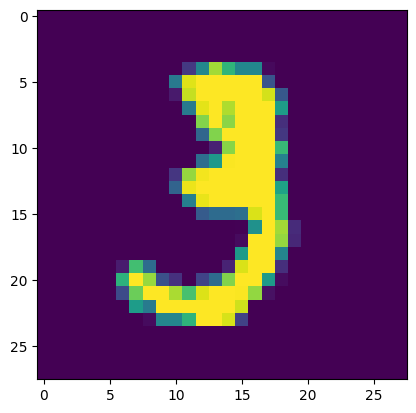

In [62]:
plt.imshow(x)

In [63]:
a = np.random.random((5,1))

In [64]:
a

array([[0.95783669],
       [0.85932131],
       [0.52303328],
       [0.20753347],
       [0.23827152]])

In [65]:
a.T

array([[0.95783669, 0.85932131, 0.52303328, 0.20753347, 0.23827152]])

In [66]:
b = np.random.random((5,5))

In [67]:
b.shape,a.shape

((5, 5), (5, 1))

In [68]:
b@a

array([[1.86687013],
       [0.34638592],
       [1.41521577],
       [1.14674399],
       [1.5847105 ]])

In [69]:
b = np.random.random((2,5))

In [70]:
b@a

array([[1.62504625],
       [1.2254917 ]])

In [71]:
b.shape,a.shape

((2, 5), (5, 1))

In [72]:
x = np.random.random((784,1))

In [73]:
x.shape

(784, 1)

In [74]:
m = np.random.random((10,784))

In [75]:
m@x

array([[189.14409241],
       [189.17616057],
       [188.4668467 ],
       [188.42830506],
       [189.50835148],
       [190.22197971],
       [184.43356693],
       [191.67508654],
       [197.37076404],
       [192.96932239]])

In [76]:
y = m@x

In [77]:
y.shape

(10, 1)

In [78]:
m.shape,x.shape

((10, 784), (784, 1))

In [79]:
np.max(y)

197.37076404340473

In [80]:
np.argmax(y)

8

In [81]:
X.shape

(60000, 1, 28, 28)

In [82]:
X.shape[0]

60000

In [83]:
X.shape[1]

1

In [84]:
X.shape[2]

28

In [85]:
X = X.reshape(X.shape[0],X.shape[2]*X.shape[3])

In [86]:
X.shape

(60000, 784)

In [87]:
X = X.T

In [88]:
m = np.random.standard_normal((10,784))

In [89]:
m.shape,X.shape

((10, 784), (784, 60000))

In [90]:
y = m@X

In [91]:
y.shape

(10, 60000)

In [92]:
y = np.argmax(y, axis=0)

In [93]:
y.shape

(60000,)

In [94]:
Y.shape

(60000,)

In [95]:
y

array([6, 4, 8, ..., 6, 9, 4])

In [96]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [97]:
y == Y

array([False, False, False, ..., False, False, False])

In [98]:
np.sum(y == Y)

6106

In [99]:
len(Y)

60000

In [100]:
acc = np.sum(y == Y)/len(Y)

In [101]:
acc

0.10176666666666667

In [102]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == Y)/len(Y)

print(acc)

0.08751666666666667


In [103]:
acc_best = 0
m_best = 0

for i in range(100):

    m = np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best:
        acc_best = acc
        m_best = m

        print(acc_best)

0.10723333333333333
0.15011666666666668
0.1624
0.16888333333333333


In [ ]:
acc_best = 0
m_best = 0

for i in range(10000):

    m = m_best + np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best:
        acc_best = acc
        m_best = m

        print(acc_best)

0.09681666666666666
0.12565
0.13168333333333335
0.15288333333333334
0.15501666666666666
0.16583333333333333
0.17133333333333334
0.18663333333333335
0.19963333333333333
0.20265
0.20845
0.2188
0.22123333333333334
0.23083333333333333
0.23293333333333333
0.23385
0.23818333333333333
0.24385
0.24635
0.25698333333333334
0.2574
0.26576666666666665
0.2687
0.26993333333333336
0.2758333333333333
0.28175
0.28253333333333336
0.28486666666666666
0.2873
0.2891166666666667
0.29491666666666666
0.29845
0.3034833333333333
0.30355
0.30551666666666666
0.3126333333333333
0.3152333333333333
0.31711666666666666
0.3195
0.32416666666666666
0.3290166666666667
0.33235
0.33455
0.3424
0.3431666666666667
0.3446666666666667
0.3459333333333333
0.3495666666666667
0.36001666666666665
0.36318333333333336
0.36566666666666664
0.3688166666666667
0.3703666666666667
0.3775833333333333
0.37825
0.38095
0.3843666666666667
0.4021166666666667
0.40703333333333336
0.4083
0.4182666666666667
0.42745
0.4328666666666667
0.43323333333333